# Liner Regression

linera regression: we can make predictions based on already known data. Linear regression is a basic machine-learning/statistics method used to predict a number by fitting a straight line through data points.

The idea (no drama)

You have:

X → input (independent variable)

Y → output (dependent variable)

Linear regression finds a line that best explains how Y changes when X changes.

scikit-learn: it is a python library used for machine learning. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# load our diabetes dataset
diabetes = load_diabetes()
# print(diabetes)

my_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

# add the target - range(25 to 346)
my_df['target']= diabetes.target

# grab the head 
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# split the data into x and y
X = my_df.drop('target', axis = 1)
y = my_df['target']
X.shape, y.shape

((442, 10), (442,))

we do training and testing. 80% of the data goes for training and then 20 % is for testing

In [5]:
from sklearn.model_selection import train_test_split
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print out the shape of the training and tesitn pslits
print("Training set shape : ", X_train.shape, y_train.shape)
print("Testing set shape : ", X_test.shape, y_test.shape)

Training set shape :  (353, 10) (353,)
Testing set shape :  (89, 10) (89,)


In [6]:
from sklearn.linear_model import LinearRegression

# create a linear regression model
lr = LinearRegression()


In [7]:
# train the model on the training set - this is how the model leanrs
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
# predict on the testing set
# y+preds are the predicted values of the target variable ased on the feature
# once we have the preds we will compare them to the actual values of the target
# to evaluat the performance of the model
y_pred = lr.predict(X_test)
y_pred.shape

(89,)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# evaluate performance of the model

# this si the variance of the dependent variable (target) explain g by the independent variables (features)
# how well the model fits the data. higher is better
r2 = r2_score(y_test, y_pred) 

# MSE: average squared dist between the predicted and actaul values. lower is better
mse = mean_squared_error(y_test, y_pred) 

# MAE: average absolute distance hte predicted and actual values. lower is better
mae = mean_absolute_error(y_test, y_pred)

# starting point of the refressions line on the y axis.
# value of the dependenct variable whent he independent variables are zero
intercept = lr.intercept_

print("r2 scpre : ", r2)
print("mean squared error: ", mse)
print("meand absolute error: ", mae)
print("intercept : ", intercept)


r2 scpre :  0.4526027629719196
mean squared error:  2900.1936284934804
meand absolute error:  42.79409467959994
intercept :  151.34560453985995


Text(0.5, 1.0, 'Predicted bs actual values (linear regresson)')

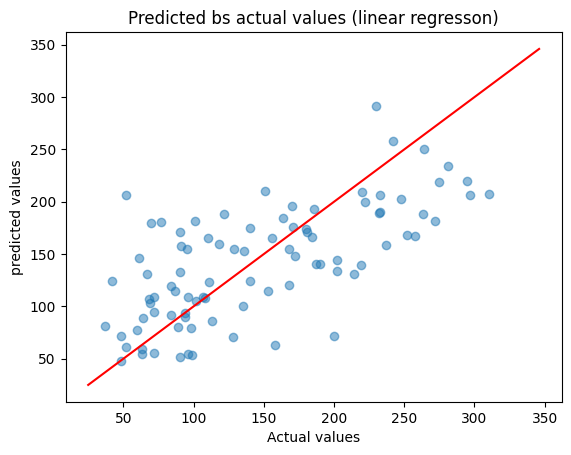

In [11]:
import matplotlib.pyplot as plt
# predicted vs actial valies
# predicted values of tha target variable are plotted on the x line\
# actial values of the taret variable are plotted on the Y-axis
# if the model is a good fit, the points shoul dbe close to the diagonal line
# indivating a strong linear relationship btwn the actual and the predicted value

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.title("Predicted bs actual values (linear regresson)")


Text(0.5, 1.0, 'Residual Plot (linear regresson)')

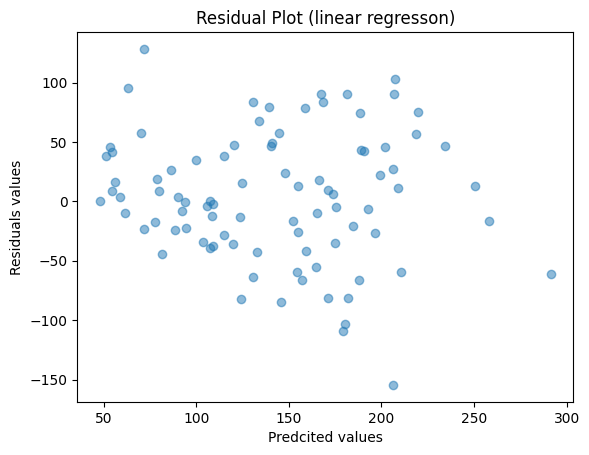

In [12]:
# plot the resuduals
# the residuals are plotted against the predicted values of the target variable
# if the linear regression model is a good fit for the data
# the residual plot should show a random scatter of the points around zero
# with no discernable trend
plt.scatter(y_pred, y_test-y_pred, alpha=0.5)
plt.xlabel("Predcited values")
plt.ylabel("Residuals values")
plt.title("Residual Plot (linear regresson)")